<a href="https://colab.research.google.com/github/feguedes/Projetos-de-DS/blob/main/covid_19_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cenário do COVID-19 no Brasil

<center><img alt="Colaboratory Logo" width="50%" src="https://github.com/feguedes/Imagens/blob/main/mulher-medica-cientista-segurando-tubo-de-ensaio_115739-987.jpg?raw=true"></center>

O coronavírus é conhecido a muito tempo porém nos deparamos com uma variação do vírus, chamado de  Coronavírus Diseases – 19.Não sabemos muito sobre o COVID-19 mas o mundo inteiro está atrás de desvendar esse problema que causou a maior pandemia dos últimos anos.
Os vírus ao contrário que muitas pessoas pensam é utilizado de forma benéfica pela nossa humanidade, combatendo alguns tipos de bactérias e ajudando no tratamento de algumas doenças. Hoje alguns vírus são utilizados em estudos para entender como as células funcionam assim sendo uma ferramenta poderosa no desenvolvimento de novos tratamentos de terapia genética ou tratamento contra câncer. Mas esses vírus não ganham a fama do covid-19 pois não nos deixam doentes.
Como o COVID-19 é novo então surgiu uma dificuldade muito grande no combate a essa doença, ele se espalha facilmente pela transmissão de gotículas, como o nosso corpo tenta combater o vírus despertando nosso sistema imunológico normalmente desenvolvemos alguns sintomas como tosses e espirros assim facilitando a transmissão do vírus.
Com base nos dados  obtidos pela Our World in Data farei uma analise cobre o desenvolvimento da doença no brasil.



## Obtendo os Dados

Todos os dados obtidos neste projeto estão disponíveis no [Our World in Data]( https://ourworldindata.org/coronavirus).
Como se trata de uma doença nova e de um caso pandêmico os dados obtidos contém algumas divergências referente as mídias e informações oficiais, não só no Brasil temos muita dificuldade na precisão dos dados pois muitos lugares não possuem testes suficientes e problema de subnotificação muito grande.

### Importação dos dados COVID-19 pelo Our World in Data


* Você pode entrar no site onde está disponível para download do arquivo [aqui](https://github.com/owid/covid-19-data/tree/master/public/data).
   * Também disponível no meu repositório [aqui](https://github.com/feguedes/Projetos-de-DS/blob/main/owid-covid-data%20(1).csv)(atualizado até o dia 18 de Junho de 2021).
* Como vamos utilizar o formato `csv` vamos importar os pacotes necessários para a leitura do arquivo e atribuir as variáveis.


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("https://raw.githubusercontent.com/feguedes/Projetos-de-DS/main/owid-covid-data%20(1).csv")

*`pd.read_csv("endereço_do_arquivo.csv`*

Atribuimos a variável *`df`*

## Análise Exploratória dos Dados
Para termos um parâmetro melhor sobre o nosso `dataset` iremos descobrir a dimensão dele.

In [51]:
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])
df.head()

Dimensões do Dataset 
Variáveis:  60 
Entradas:  96662


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


Observamos acima que o `dataset` tem 96.662 entradas com 60 variáveis, quais são essas variáveis?

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Tem um aspecto muito importante que deve ser levado em conta, que são os tipos de variáveis se são números inteiros, quebrados ou palavras.
Utilizando o comando `dtypes` podemos obter essa informação.


In [ ]:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi


Podemos observar que a coluna date está como um tipo `object` e não `datetime` então para regularizar o formato vamos alterar o tipo desta variável.


In [ ]:
df.date = pd.to_datetime(df.date)


Uma vez alterado o tipo dessa variável conseguimos saber qual a data máxima obtida nesse `dataset` utilizando`df.date.max()` e também a data do primeiro dado informado nesse `dataset` alterando apenas o `max`por`min`.


In [ ]:
df.date.max()

Timestamp('2021-06-18 00:00:00')

In [52]:
df.date.min()

Timestamp('2020-01-01 00:00:00')

Bom agora sabemos que nossos dados são a partir do dia 01 de janeiro de 2020 até o dia 18 de junho de 2020.
Lembrando que está análise tem como intervalo destas datas.


Como sabemos as datas e o tamanho do nosso arquivo precisamos achar um fator muito importante que são os dados ausentes. Lembre-se que não são **quais** dados estão faltando e sim o **motivo** pelo qual estarem ausentes.

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                    0.990741
weekly_icu_admissions_per_million        0.990741
weekly_hosp_admissions                   0.984213
weekly_hosp_admissions_per_million       0.984213
excess_mortality                         0.964753
icu_patients                             0.898843
icu_patients_per_million                 0.898843
people_fully_vaccinated_per_hundred      0.882156
people_fully_vaccinated                  0.882156
hosp_patients                            0.874201
hosp_patients_per_million                0.874201
new_vaccinations                         0.870528
people_vaccinated                        0.852403
people_vaccinated_per_hundred            0.852403
total_vaccinations_per_hundred           0.844913
total_vaccinations                       0.844913
new_vaccinations_smoothed_per_million    0.732656
new_vaccinations_smoothed                0.732656
total_tests                              0.552265
total_tests_per_thousand                 0.552265


Por ser um `dataset` que é atualizado diariamente e algumas variaveis novas são adicionadas é normal que tenham muitos dados ausentes dentro deste intervalo, mas o que conseguimos tirar de valioso olhando os dados que temos?
Vamos achar o país líder em casos nesta data.
Para isso vamos isolar os países, pois no nosso data set possui entradas referente a continentes e mundial total.

In [ ]:
df_clean = df.dropna(subset=['continent'])

Uma vez isolando os países podemos ter um dado mais solido referente aos novos casos e vamos olhar também o total de mortes até a respectiva data.

In [ ]:
df_clean.loc[df.date == '2021-06-18'].sort_values(by='total_cases', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
92123,USA,North America,United States,2021-06-18,33516175.0,7308.0,9596.429,601571.0,637.0,312.286,101256.517,22.078,28.992,1817.421,1.924,0.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316048776.0,176290249.0,148459003.0,1079390.0,1362712.0,94.50,52.71,44.39,4075.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
40477,IND,Asia,India,2021-06-18,29823546.0,60753.0,66341.571,385137.0,1647.0,2579.429,21611.197,44.024,48.073,279.084,1.193,1.869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266355940.0,217542993.0,48812947.0,3385690.0,3236100.0,19.30,15.76,3.54,2345.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
12776,BRA,South America,Brazil,2021-06-18,17801462.0,98832.0,72192.000,498499.0,2495.0,2037.714,83748.172,464.962,339.632,2345.222,11.738,9.587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85390996.0,61270446.0,24120550.0,1288841.0,1233201.0,40.17,28.83,11.35,5802.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
31829,FRA,Europe,France,2021-06-18,5814648.0,3187.0,2737.286,110864.0,68.0,51.143,86061.015,47.170,40.514,1640.868,1.006,0.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,6.756425e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
89479,TUR,Asia,Turkey,2021-06-18,5359728.0,5575.0,5767.000,49071.0,59.0,68.286,63549.766,66.102,68.379,581.830,0.700,0.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40619152.0,26301413.0,14317739.0,1172951.0,1095166.0,48.16,31.19,16.98,12985.0,NaN,8.433907e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,CUW,North America,Curacao,2021-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163693.0,87910.0,75783.0,504.0,444.0,99.75,53.57,46.18,2706.0,NaN,1.641000e+05,362.644,41.7,16.367,10.068,NaN,NaN,NaN,11.62,NaN,NaN,NaN,NaN,78.88,NaN,NaN
30237,FRO,Europe,Faeroe Islands,2021-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41473.0,25856.0,15617.0,NaN,337.0,84.87,52.91,31.96,6897.0,NaN,4.886500e+04,35.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.67,NaN,NaN
35120,GRL,North America,Greenland,2021-06-18,N

In [ ]:
df_clean.loc[df.date == '2021-06-18'].sort_values(by='total_deaths', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
92123,USA,North America,United States,2021-06-18,33516175.0,7308.0,9596.429,601571.0,637.0,312.286,101256.517,22.078,28.992,1817.421,1.924,0.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316048776.0,176290249.0,148459003.0,1079390.0,1362712.0,94.50,52.71,44.39,4075.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
12776,BRA,South America,Brazil,2021-06-18,17801462.0,98832.0,72192.000,498499.0,2495.0,2037.714,83748.172,464.962,339.632,2345.222,11.738,9.587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85390996.0,61270446.0,24120550.0,1288841.0,1233201.0,40.17,28.83,11.35,5802.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
40477,IND,Asia,India,2021-06-18,29823546.0,60753.0,66341.571,385137.0,1647.0,2579.429,21611.197,44.024,48.073,279.084,1.193,1.869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266355940.0,217542993.0,48812947.0,3385690.0,3236100.0,19.30,15.76,3.54,2345.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN
56774,MEX,North America,Mexico,2021-06-18,2471741.0,4098.0,3274.429,230959.0,167.0,162.286,19170.777,31.784,25.396,1791.314,1.295,1.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN
69322,PER,South America,Peru,2021-06-18,2023179.0,3463.0,3589.000,189933.0,176.0,261.857,61360.805,105.029,108.850,5760.460,5.338,7.942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56923,FSM,Oceania,Micronesia (country),2021-06-18,1.0,0.0,0.000,NaN,NaN,0.000,8.694,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150210e+05,150.777,23.0,4.810,2.392,3299.464,16.0,454.343,12.02,NaN,NaN,NaN,NaN,67.88,0.620,NaN
66929,PLW,Oceania,Palau,2021-06-18,2.0,0.0,0.000,NaN,NaN,0.000,110.546,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.809200e+04,47.237,NaN,NaN,NaN,13240.405,NaN,NaN,15.89,7.7,22.7,NaN,4.80,73.70,0.826,NaN
74385,WSM,Oceania,Samoa,2021-06-18,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.00

Olhando pela planilha do próprio Colab poderíamos sim já saber qual o país líder em novos casos e total de mortes até o dia 18 de junho de  2021.
* United States - 33.516.175 casos
* India - 29.823.546 casos
* Brasil - 17.801.462 casos
* França - 5.814.648 casos
* Turquia - 5.359.728 casos

Total de mortes:
* United States - 601.571 mortes
* Brasil - 498.499 mortes
* India - 385.137 mortes 
* Mexico - 230.959 mortes
* Peru - 189.933 mortes


 mas vamos exemplificar em um gráfico para melhor visualização os 5 paises com maior número de morte até a respectiva data.

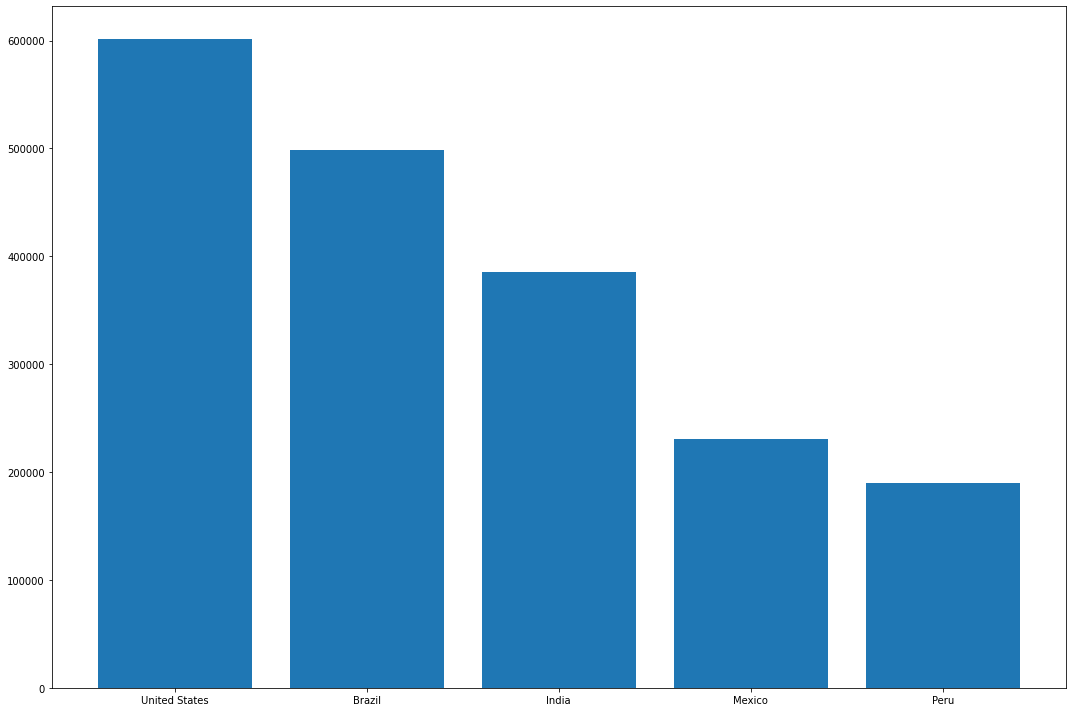

In [ ]:
total_5_deaths = df_clean.loc[df.date == '2021-06-18', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[:5]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=total_5_deaths)
plt.tight_layout()

### Progreção do vírus

Todos temos a preocupação de saber como será o futuro e quando podemos ficar livre ou controlar esse vírus, então o modo mais fácil de visualização será através de um gráfico de linhas que mostra a progressão do vírus até o momento.

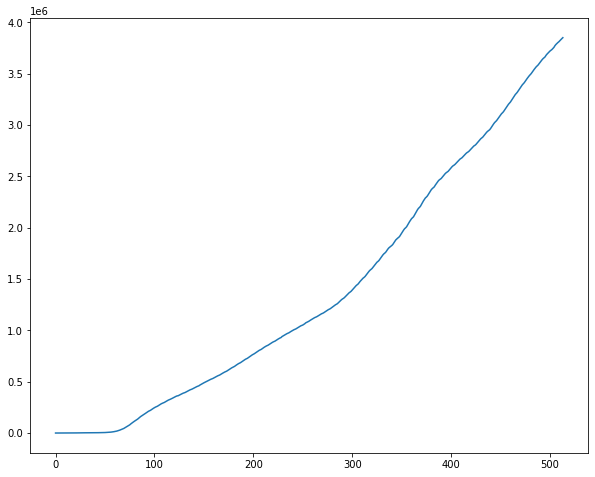

In [ ]:
df.loc[df.location == "World", 'total_deaths'].reset_index(drop=True).plot(figsize=(10,8));

Não parece ser muito prospero né?

### Cenário do Brasil

Conseguimos isolar a localização do Brasil em nosso `dataset` para analisar de forma mais eficiente o país. 
Criando uma nova variável `df_brasil = df.loc[df.location ==  “Brazil”].copy()`
E visualizando com `df_brasi.head()`.


In [ ]:
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12298,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12299,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12300,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12301,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
12302,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


Como nosso `dataset` está condicionado ao nosso intervalo de datas, só conseguiremos avaliar os dados de Fevereiro de 2020 até o dia 18 de Junho de  2021, mas já temos um panorama geral sobre a atualidade. 

In [ ]:
df_brasil.loc[df_brasil['new_deaths'] !=0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12298,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


Para finalizar a nossa breve analise sobre o cenário brasileiro iremos plotar um gráfico referente aos casos e mortes no brasil e em escala logarítmica.

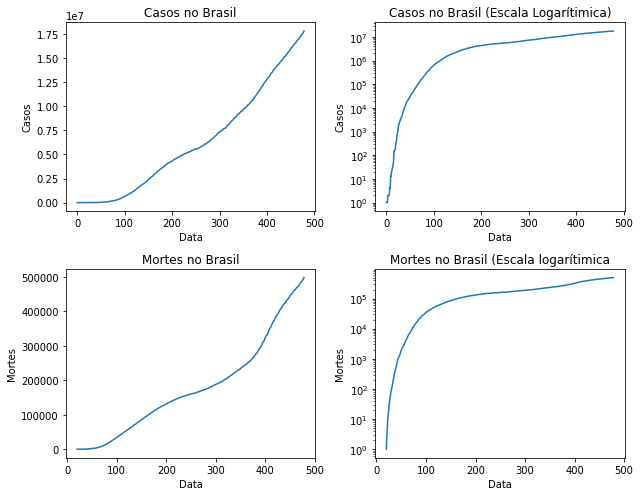

In [ ]:
x = list(range(479))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9,7))

ax1.set_title("Casos no Brasil")
ax1.set_xlabel("Data")
ax1.set_ylabel("Casos")
ax1.plot(x, z)

ax2.set_title("Casos no Brasil (Escala Logarítimica)")
ax2.set_xlabel("Data")
ax2.set_ylabel("Casos")
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title("Mortes no Brasil")
ax3.set_xlabel("Data")
ax3.set_ylabel("Mortes")
ax3.plot(x, z2)

ax4.set_title("Mortes no Brasil (Escala logarítimica")
ax4.set_xlabel("Data")
ax4.set_ylabel("Mortes")
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.tight_layout()

## Conclusão
Levando em consideração que os dados apresentados são atualizados diariamente, então será rapidamente desatualizado.
Porém mesmo levando isso em consideração podemos tirar muitas informações uteis da nossa análise:
*	Mesmo hoje sabendo como está a vacinação nos Estados Unidos a negligência os destacou liderando os casos e as mortes.
*	Brasil por sua vez continua com um número extremamente preocupante tanto no número de casos quanto o número de morte ocupando o terceiro lugar no ranking de casos e a segunda posição quando falamos de mortes.
*	Como ainda não estamos livres dessa pandemia e os números ainda estão crescendo em lugares que não tem acesso a quantidade necessária de vacinas essa análise tem o intuito de mostrar brevemente a situação do COVID-19.

Com esses dados podem ser feitas outras análises, como a quantidade de vacinas aplicadas nesse intervalo de tempo e muito mais, com essa análise já obtemos muitas informações.
